 # Basic Data Science in Python - Exercises 30/9 #

In [ ]:
!pip install torch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import torch
from torch import optim

### Exercise 1: Neural Nets in Sklearn
So far we have been using models only from Sklearn. Sklearn has some support for neural networks, however packages like Pytorch and Keras are much more flexible. Let's try out the simple [Multi-Layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from the Sklearn library.
Try different activation functions, hidden layers and solvers to see which works best. Remember what you know of overfitting!

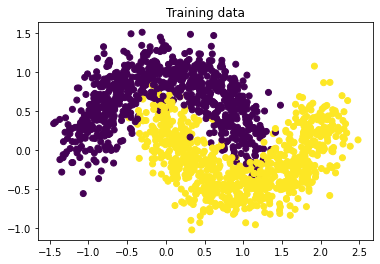

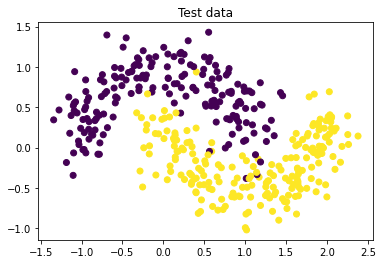

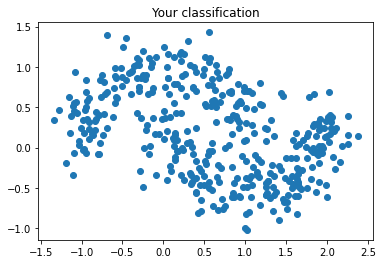

NameError: name 'mlp' is not defined

In [3]:
X, y = datasets.make_moons(n_samples=2000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Plot the training data
plt.scatter(*X_train.T, c=y_train)
plt.title("Training data")
plt.show()
pred = None

### YOUR CODE HERE 

### YOUR CODE HERE

plt.scatter(*X_test.T, c=y_test)
plt.title("Test data")
plt.show()
plt.scatter(*X_test.T, c=pred)
plt.title("Your classification")
plt.show()
print("In-sample score:", mlp.score(X_train, y_train))
print("Test score:", mlp.score(X_test, y_test))

### Exercise 2: Overfitting
Below we have fitted a dataset of 15 points with a polynomium. How has the overfitting occoured? Can you fix it?

Best degree: 9


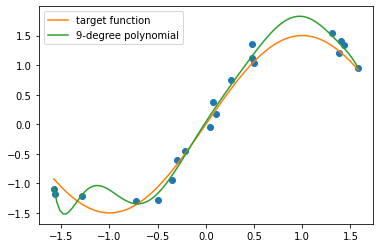

In [4]:
def target_function(x):
    return 1.5*np.sin(0.5*np.pi*x)

X = np.sort(np.random.randn(20))
y = target_function(X) + np.random.randn(20)*0.2
plt.plot(X, y, "o")

best_deg = None
best_score = 0

for deg in range(1, 10):
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
        ])
    pipeline.fit(X[:, np.newaxis], y)
    if pipeline.score(X[:, np.newaxis], y) > best_score:
        best_deg = deg
        best_score = pipeline.score(X[:, np.newaxis], y)
        
print("Best degree:", best_deg)

polynomial_features = PolynomialFeatures(degree=best_deg, include_bias=False)

linear_regression = LinearRegression()
pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
        ])

x = np.linspace(X.min(), X.max(), 100)
pipeline.fit(X[:, np.newaxis], y)
plt.plot(x, target_function(x), label="target function")
plt.plot(x, pipeline.predict(x[:, np.newaxis]), label=f"{best_deg}-degree polynomial")
plt.legend()

### Exercise 3: Implement a Regression Neural Net with one hidden layer
Implement a neural network with one hidden layer with Pytorch, with the [clamp](https://pytorch.org/docs/stable/generated/torch.clamp.html) function as non-linear activation function. Use Pytorch's [stochastic gradient descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) optimizer to perform Gradient Descent.

The neural network has two weight matrices $W_1, W_2$ and two bias vectors $b_1, b_2$. Let $\sigma$ be the clamp function, then we can express the entire neural network as:

$$NN(x) = W_2 \sigma(W_1 x + b_1) + b_2 $$

We will be using the mean squared loss function with weight decay: $$\frac{1}{n}\sum_{i=1}^n (NN(x_i) - y_i)^2 +  c \sum_{i=1}^d W_i^2$$

Your task is to implement the gradient descent in the fit function.

In [6]:
class NN():
    
    def init(self):
        self.W1 = None
        self.b1 = None
        self.W2 = None
        self.b2 = None
        
    def predict(self, X, W1, b1, W2, b2):
        input_layer = X @ W1 + b1
        output_layer = input_layer.clamp(min=0) @ W2 + b2
        return output_layer
    
    def fit(self, X, y, hidden_size=32, epochs=100, eps=0.01, c=0.01):
        W1 = torch.randn(X.shape[1], hidden_size, requires_grad = True)
        b1 = torch.randn(1, hidden_size, requires_grad = True)
        W2 = torch.randn(hidden_size, 1, requires_grad = True)
        b2 = torch.randn(1, 1, requires_grad = True)  
        sgd = optim.SGD(params={W1, b1, W2, b2}, lr=0.01)
        for epoch in range(epochs):
        ### YOUR CODE HERE - use PyTorch to perform gradient descent!
            pass
        ### YOUR CODE HERE
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2
        
    #Calculate the mean squared loss
    def cost(self, X, y, W1, b1, W2, b2, c=0.0):
        loss = None
        pred = self.predict(X, W1, b1, W2, b2)
        loss = torch.mean((pred-y)**2) 
        loss = loss + c * (torch.sum(W1**2) + torch.sum(W2**2))
        return loss

    
    def score(self, X, y):
        return self.cost(X, y, self.W1, self.b1, self.W2, self.b2, c=0.0)

In [ ]:
boston = datasets.load_boston()
X, y = boston.data, boston.target
#Normalize the dataset
X = (X - X.mean(axis=0))/(X.std(axis=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
tX_train = torch.from_numpy(X_train).float()
tX_test = torch.from_numpy(X_test).float()
ty_train = torch.from_numpy(y_train).float().view(-1, 1)
ty_test = torch.from_numpy(y_test).float().view(-1, 1)

#Loss go down means model more gooder!
net = NN()
net.fit(tX_train, ty_train, epochs=100, hidden_size=16)
print("Test score: ", net.score(tX_test, ty_test).item())

### Exercise 4: Implement Perceptron (Hard)
Implement a simple perceptron learning algorithm for linearly seperable data. Test your implementation on the below dataset

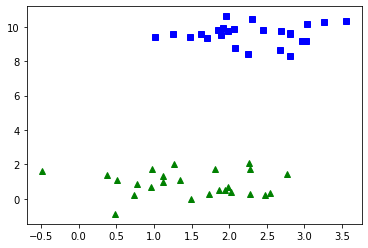

In [8]:
X, Y = datasets.make_blobs(n_samples=50, centers=2, n_features=2, center_box=(0, 10), cluster_std=0.7)
Y = 2*Y-1
plt.plot(X[:, 0][Y == -1], X[:, 1][Y == -1], 'g^')
plt.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
plt.show()

<ipython-input-9-154c6bb7f18f>:33: RuntimeWarning: invalid value encountered in divide
  y = (-b - w[0]*x)/w[1]


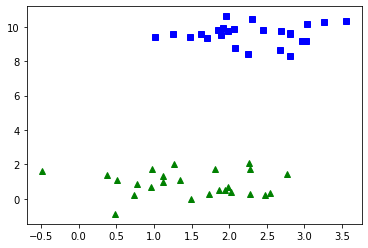

In [9]:
class Perceptron():
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def fit(self, X, Y):
        w = np.array([0, 0])
        b = 0
        ### YOUR CODE HERE

        ### YOUR CODE HERE
        self.w = w
        self.b = b
    
    def predict(self, X):
        prediction = None
        ### YOUR CODE HERE

        ### YOUR CODE HERE
        return prediction
        

#For plotting your hyperplane!
clf = Perceptron()
clf.fit(X, Y)
w, b = clf.w, clf.b
fig, ax = plt.subplots()
ax.plot(X[:, 0][Y == -1], X[:, 1][Y == -1], 'g^')
ax.plot(X[:, 0][Y == 1], X[:, 1][Y == 1], 'bs')
xmin, xmax, _, _ = ax.axis()
x = np.array([xmin, xmax])
y = (-b - w[0]*x)/w[1]
plt.plot(x, y)
plt.show()